**Алина, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделала большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 


# Определение перспективного тарифа для телеком-компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li>
<li><span><a href="#Подготовка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li>
<li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li>
<li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span>
<li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span>
</div>

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Чтобы скорректировать рекламный бюджет, необходимо понять, какой тариф приносит больше денег.

<b>Цели исследования:</b>
- сделать предварительный анализ тарифов на небольшой выборке клиентов. 
- проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b>Входные данные:</b>
Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Молодец, что задала цель исследования! Сюда также можно включить важные пункты, на которые стоит обращать внимание. К примеру, «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings 
from pylab import rcParams
from scipy import stats as st

In [2]:
calls = pd.read_csv("/datasets/calls.csv")
internet = pd.read_csv("/datasets/internet.csv", index_col=0)
messages = pd.read_csv("/datasets/messages.csv")
tariffs = pd.read_csv("/datasets/tariffs.csv")
users = pd.read_csv("/datasets/users.csv")

In [3]:
print(calls.info())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
print(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Unnamed: 0 возникает, когда данные сохраняют с указанием индекса pd.DataFrame().to_csv(..., index=column). Если при чтении указать этот столбец pd.read_csv(..., index_col=0) - данные сразу прочитаются корректно.

<div class="alert alert-info"> Исправила, дальше не придется отдельно удалять этот столбец</div>

In [5]:
print(messages.info())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
print(tariffs.info())
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div class="alert alert-block alert-info">
     Всего в данном проекте представлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Данные представлены в нескольких таблицах. Пропуски присутствуют только в таблице users в поле churn_date (дата прекращения пользования тарифом (пропущенное значение означает, что тариф ещё действовал на момент выгрузки данных). Значит избавляться от данных пропусков не нужно. Дубликаты обнаружены не были. 
</div>   

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Можно еще посмотреть на распределение даннх, чтобы понять, есть ли выбросы

## Подготовка данных

### Приведение данных к нужному типу

<div class="alert alert-block alert-info">
Приведем поля с датами во всех таблицах к типу дата
</div>

<div class="alert alert-block alert-info">
Также для экономии памяти поменяем некоторые поля типа float64 на float32 и с int64 на int32
</div>

In [8]:
def change_type_date(df):
    for column in df.columns:
        if 'date' in column:
            df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
        if df[column].dtypes == 'float64':
            df[column] = df[column].astype('float32')
        if df[column].dtypes == 'int64':
            df[column] = df[column].astype('int32')
    return df

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Отличный способ сэкономить память

In [9]:
calls = change_type_date(calls)
internet = change_type_date(internet)
messages = change_type_date(messages)
users = change_type_date(users)

<div class="alert alert-block alert-info">
Также необходимо округлить по условию каждый звонок секунды до минут в большую сторону.
</div>

In [10]:
calls['duration'] = calls['duration'].apply(math.ceil)

In [11]:
calls['duration'] = np.ceil(calls['duration'])

<div class="alert alert-block alert-info">
Проверим результат
</div>


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Выбран корректный метод округления. Однако применение math.ceil с помощью apply - не оптимальный способ. math.ceil не нуждается в apply, т.к. может работать сразу со всем столбцом.

<div class="alert alert-block alert-info">
    
**Вопрос студента**

Я применила метод ceil ко всему столбцу, но возникает ошибка.
В чем дело?
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Очень странная ошибка, возможно, версия Питона не совпадает с нужной здесь. Показала еще один метод округления - np.ceil

In [12]:
dfs = [calls, internet, messages, users]
for df in dfs:
    print(df.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 5.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float32       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int32         
dtypes: datetime64[ns](1), float32(1), int32(1), object(1)
memory usage: 4.6+ MB
None
<class 'pandas

### Проверка на пропуски и дубликаты

In [13]:
print(calls.isna().sum())
print('Количество дубликатов:', calls.duplicated().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64
Количество дубликатов: 0


In [14]:
print(internet.isna().sum())
print('Количество дубликатов:', internet.duplicated().sum())

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
Количество дубликатов: 0


In [15]:
print(messages.isna().sum())
print('Количество дубликатов:', messages.duplicated().sum())

id              0
message_date    0
user_id         0
dtype: int64
Количество дубликатов: 0


In [16]:
print(tariffs.isna().sum())
print('Количество дубликатов:', tariffs.duplicated().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
Количество дубликатов: 0


In [17]:
print(users.isna().sum())
print('Количество дубликатов:', users.duplicated().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
Количество дубликатов: 0


<div class="alert alert-block alert-info">
Пропуски присутствуют только в таблице users в поле churn_date (дата прекращения пользования тарифом (пропущенное значение означает, что тариф ещё действовал на момент выгрузки данных). Значит избавляться от данных пропусков не нужно. Дубликаты обнаружены не были. 
</div>   

### Проверка на аномалии

<div class="alert alert-block alert-info">
Также необходимо проверить данные на аномалии
</div>

In [18]:
print(calls['call_date'].min(), calls['call_date'].max())
calls.describe()

2018-01-01 00:00:00 2018-12-31 00:00:00


,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


In [19]:
print(internet['session_date'].min(), internet['session_date'].max())
internet.describe()

2018-01-01 00:00:00 2018-12-31 00:00:00


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192444,1252.099842
std,278.300964,144.050823
min,0.000000,1000.000000
25%,138.187496,1130.000000
50%,348.014999,1251.000000
75%,559.552490,1380.000000
max,1724.829956,1499.000000


In [20]:
print(messages['message_date'].min(), messages['message_date'].max())
messages.describe()

2018-01-02 00:00:00 2018-12-31 00:00:00


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [21]:
print(users['churn_date'].min(), users['reg_date'].min())
print(users['churn_date'].max(), users['reg_date'].max()) 
print(users['tariff'].unique())
users.describe()

2018-08-17 00:00:00 2018-01-01 00:00:00
2018-12-30 00:00:00 2018-12-31 00:00:00
['ultra' 'smart']


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<div class="alert alert-block alert-info">
Аномалии также не были обнаружены
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  Отлично, что сделала эту проверку!

### Расчеты для каждого пользователя

In [22]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
calls['month'] = calls['call_date'].astype('datetime64[M]')
calls_quantity = calls.pivot_table(
                                    'duration', 
                                    index=['user_id', 'month'], 
                                    aggfunc=['count', 'sum']
)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Молодец, что используешь метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex.

In [23]:
#количество отправленных сообщений по месяцам
messages['month'] = messages['message_date'].astype('datetime64[M]')
messages_quantity = (
    messages
    .groupby(['user_id','month'])
    .agg(messages_quantity=('id', 'count'))
)

In [24]:
#объем израсходованного интернет-трафика по месяцам
internet['month'] = internet['session_date'].astype('datetime64[M]')
internet_volume = pd.pivot_table(
    internet,                  
    values='mb_used', 
    index=['user_id', 'month'], 
    aggfunc='sum'
)

In [25]:
#Рассчитаем помесячную выручку дл каждого пользователя
#Для начала объединими таблицы в одну
user_information = calls_quantity.join([messages_quantity, internet_volume], how='outer')
user_information.columns = ['calls_quantity', 'duration_total', 'messages_quantity', 'traffic_volume']
user_information = user_information.reset_index()

In [26]:
print("Количество строк в таблицах до объединения:\n", len(calls_quantity), '\n', len(messages_quantity), '\n', len(internet_volume))

Количество строк в таблицах до объединения:
 3174 
 2717 
 3203


In [27]:
#Проверку на количество строк
calls_messages = len(calls_quantity) + len(messages_quantity) - len(calls_quantity.join([messages_quantity], how='inner'))
print('После объединения таблиц calls и messages получаем количество строк:', calls_messages)
first_table = calls_quantity.join([messages_quantity], how='outer')
calls_messages_internet = calls_messages + len(internet_volume) - len(first_table.join([internet_volume], how='inner'))
print('После объединения всех таблиц получаем количество строк:', calls_messages_internet)

После объединения таблиц calls и messages получаем количество строк: 3213
После объединения всех таблиц получаем количество строк: 3214


In [28]:
user_information

,user_id,month,calls_quantity,duration_total,messages_quantity,traffic_volume
0,1000,2018-05-01,22.0,159.0,22.0,2253.489990
1,1000,2018-06-01,43.0,172.0,60.0,23233.769531
2,1000,2018-07-01,47.0,340.0,75.0,14003.639648
3,1000,2018-08-01,52.0,408.0,81.0,14055.929688
4,1000,2018-09-01,58.0,466.0,57.0,14568.910156
...,...,...,...,...,...,...
3209,1498,2018-10-01,41.0,247.0,42.0,20579.359375
3210,1499,2018-09-01,9.0,70.0,11.0,1845.750000
3211,1499,2018-10-01,68.0,449.0,48.0,17788.509766
3212,1499,2018-11-01,74.0,612.0,59.0,17963.310547


In [29]:
#для каждого пользователя добавим информацию о тарифе из таблицы users
user_information = user_information.merge(users[['user_id', 'tariff', 'city']], how='left', on='user_id')

In [30]:
#Проверим полученную таблицу на пропуски
print(user_information.isna().sum())
#Посмотрим, что за записи с пропущенными данными по звонкам
user_information[user_information['duration_total'].isna()]

user_id                0
month                  0
calls_quantity        40
duration_total        40
messages_quantity    497
traffic_volume        11
tariff                 0
city                   0
dtype: int64


,user_id,month,calls_quantity,duration_total,messages_quantity,traffic_volume,tariff,city
570,1091,2018-05-01,NaN,NaN,30.0,10703.370117,ultra,Набережные Челны
571,1091,2018-06-01,NaN,NaN,30.0,10236.189453,ultra,Набережные Челны
572,1091,2018-07-01,NaN,NaN,35.0,16444.980469,ultra,Набережные Челны
573,1091,2018-08-01,NaN,NaN,31.0,12633.879883,ultra,Набережные Челны
574,1091,2018-09-01,NaN,NaN,32.0,16597.109375,ultra,Набережные Челны
575,1091,2018-10-01,NaN,NaN,44.0,15644.729492,ultra,Набережные Челны
576,1091,2018-11-01,NaN,NaN,28.0,11864.250000,ultra,Набережные Челны
577,1091,2018-12-01,NaN,NaN,42.0,13280.450195,ultra,Набережные Челны
671,1106,2018-04-01,NaN,NaN,9.0,2923.489990,ultra,Калуга
672,1106,2018-05-01,NaN,NaN,28.0,16573.009766,ultra,Калуга


In [31]:
user_information[user_information['traffic_volume'].isna()]

,user_id,month,calls_quantity,duration_total,messages_quantity,traffic_volume,tariff,city
1722,1273,2018-05-01,24.0,220.0,21.0,NaN,ultra,Курган
1723,1273,2018-06-01,40.0,230.0,38.0,NaN,ultra,Курган
1724,1273,2018-07-01,44.0,253.0,37.0,NaN,ultra,Курган
1725,1273,2018-08-01,53.0,253.0,41.0,NaN,ultra,Курган
1726,1273,2018-09-01,33.0,223.0,32.0,NaN,ultra,Курган
1727,1273,2018-10-01,40.0,315.0,35.0,NaN,ultra,Курган
1728,1273,2018-11-01,45.0,272.0,29.0,NaN,ultra,Курган
1729,1273,2018-12-01,41.0,260.0,39.0,NaN,ultra,Курган
2387,1377,2018-02-01,23.0,179.0,2.0,NaN,ultra,Брянск
2500,1392,2018-02-01,2.0,13.0,3.0,NaN,ultra,Челябинск


In [32]:
user_information[user_information['messages_quantity'].isna()]

,user_id,month,calls_quantity,duration_total,messages_quantity,traffic_volume,tariff,city
8,1001,2018-11-01,59.0,430.0,NaN,18429.339844,smart,Москва
9,1001,2018-12-01,63.0,414.0,NaN,14036.660156,smart,Москва
42,1006,2018-02-01,3.0,42.0,NaN,1392.150024,smart,Ульяновск
43,1006,2018-03-01,46.0,286.0,NaN,17287.929688,smart,Ульяновск
44,1006,2018-04-01,47.0,356.0,NaN,13936.700195,smart,Ульяновск
...,...,...,...,...,...,...,...,...
3181,1494,2018-08-01,32.0,262.0,NaN,6590.750000,smart,Омск
3182,1494,2018-09-01,66.0,501.0,NaN,16962.509766,smart,Омск
3183,1494,2018-10-01,52.0,354.0,NaN,17767.240234,smart,Омск
3184,1494,2018-11-01,63.0,411.0,NaN,18052.449219,smart,Омск


In [33]:
user_information = user_information.fillna(0)
user_information.isna().sum()

user_id              0
month                0
calls_quantity       0
duration_total       0
messages_quantity    0
traffic_volume       0
tariff               0
city                 0
dtype: int64

In [34]:
#создадим отдельные объекты для каждого тарифа
smart = tariffs[tariffs['tariff_name'] == 'smart']
ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Идеальное объединение таблиц! Параметр how='outer' предотвратит потерю уникальных пользователей

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> После объединения таблиц всегда очень полезно сделать проверку на корректность: сравнить кол-во уникальных идентификаторов до и после объединения

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> После объединения также важно заполнить пропуски в новой таблице нулями. Это может повлиять на результаты анализа

<div class="alert alert-block alert-info">
Сделала проверку на количество строк. Все сходится. Последовательно объединила таблицы и вычла общие записи для корректного подсчета общих записей. 
    
Также заполнила пропуски нулями, поскольку записи с пропущенными значениями в поле Звонки содержат информацию по трафику, их нельзя удалять. Может просто данные пользователи использовали тариф для использования интернета. Аналогично и с пропусками в поле Интернет и Сообщения

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Абсолютно верно

In [35]:
#создадим функцию, которая высчитывает прибыль для каждого пользователя
def gain(row):
    profit = 0
    if row['tariff'] == 'smart':
        sub_calls = row['duration_total'] - smart['minutes_included'][0]
        sub_messages = row['messages_quantity'] - smart['messages_included'][0]
        sub_traffic = row['traffic_volume'] - smart['mb_per_month_included'][0]
        if sub_calls > 0:
            profit += sub_calls * smart['rub_per_minute'][0]
        if sub_messages > 0:
            profit += sub_messages * smart['rub_per_message'][0]
        if sub_traffic > 0:
            profit += math.ceil(sub_traffic / 1024) * smart['rub_per_gb'][0]
        return profit + smart['rub_monthly_fee'][0]
    if row['tariff'] == 'ultra':
        sub_calls = row['duration_total'] - ultra['minutes_included'][1]
        sub_messages = row['messages_quantity'] - ultra['messages_included'][1]
        sub_traffic = row['traffic_volume'] - ultra['mb_per_month_included'][1]
        if sub_calls > 0:
            profit += sub_calls * ultra['rub_per_minute'][1]
        if sub_messages > 0:
            profit += sub_messages * ultra['rub_per_message'][1]
        if sub_traffic > 0:
            profit += math.ceil(sub_traffic / 1024) * ultra['rub_per_gb'][1]    
        return profit + ultra['rub_monthly_fee'][1]

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 1 Гб = 1024 Мб

<div class="alert alert-block alert-info">
Исправила
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Функция работает корректно

In [36]:
user_information

,user_id,month,calls_quantity,duration_total,messages_quantity,traffic_volume,tariff,city
0,1000,2018-05-01,22.0,159.0,22.0,2253.489990,ultra,Краснодар
1,1000,2018-06-01,43.0,172.0,60.0,23233.769531,ultra,Краснодар
2,1000,2018-07-01,47.0,340.0,75.0,14003.639648,ultra,Краснодар
3,1000,2018-08-01,52.0,408.0,81.0,14055.929688,ultra,Краснодар
4,1000,2018-09-01,58.0,466.0,57.0,14568.910156,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,2018-10-01,41.0,247.0,42.0,20579.359375,smart,Владикавказ
3210,1499,2018-09-01,9.0,70.0,11.0,1845.750000,smart,Пермь
3211,1499,2018-10-01,68.0,449.0,48.0,17788.509766,smart,Пермь
3212,1499,2018-11-01,74.0,612.0,59.0,17963.310547,smart,Пермь


In [37]:
user_information['gain'] = user_information.apply(gain, axis=1)

In [38]:
user_information.head()

,user_id,month,calls_quantity,duration_total,messages_quantity,traffic_volume,tariff,city,gain
0,1000,2018-05-01,22.0,159.0,22.0,2253.489990,ultra,Краснодар,1950.0
1,1000,2018-06-01,43.0,172.0,60.0,23233.769531,ultra,Краснодар,1950.0
2,1000,2018-07-01,47.0,340.0,75.0,14003.639648,ultra,Краснодар,1950.0
3,1000,2018-08-01,52.0,408.0,81.0,14055.929688,ultra,Краснодар,1950.0
4,1000,2018-09-01,58.0,466.0,57.0,14568.910156,ultra,Краснодар,1950.0


<div class="alert alert-block alert-info">
    
**Вопрос студента** 

Может я написала слишком сложную функцию? Как вариант, можно было в таблиицу user_information добавить поля из таблицы tariffs и функция для расчета была бы поменьше...
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Можно сделать и так. Но твоя функция рабочая и не выглядит монструозной

<div class="alert alert-block alert-info">
Таким образом, подготовили данные для анализа. Пропуски, которые нужно менять обнаружены не были. Аномалии также не были выявлены. Единственная ошибка в данных, лишний столбец в одной таблице. Преобразовали данные к нужному типу. 
Произвели необходимые расчеты для каждого пользователя.
</div>

## Анализ данных

In [39]:
#Рассчитаем среднее количество минут разговора, сообщений и объём трафика для каждого тарифа в месяц
month_data = user_information.pivot_table(
    values=['duration_total', 'messages_quantity', 'traffic_volume'], 
    index=['tariff', 'month']
)

In [40]:
month_data

duration_total  messages_quantity  traffic_volume
tariff month                                                        
smart  2018-01-01      203.852941          18.235294     8513.717773
       2018-02-01      298.689655          24.086207    11597.054688
       2018-03-01      390.051948          31.857143    15104.159180
       2018-04-01      367.133929          30.741071    13462.180664
       2018-05-01      387.361702          33.773050    15805.184570
       2018-06-01      395.640244          33.402439    15794.648438
       2018-07-01      408.353234          33.751244    15743.150391
       2018-08-01      421.468085          33.638298    16610.720703
       2018-09-01      428.611538          33.638462    16303.579102
       2018-10-01      426.136054          33.765306    16757.123047
       2018-11-01      435.265823          34.075949    16895.697266
       2018-12-01      478.560831          35.994065    18113.662109
ultra  2018-01-01      428.111111          33.777778    13140.680664
       2018-02-01      297.125000          21.958333    11775.937500
       2018-03-01      489.648649          32.297297    17535.550781
       2018-04-01      458.018182          31.563636    16828.134766
       2018-05-01      510.328358          37.850746    19363.152344
       2018-06-01      479.702381          41.726190    18924.939453
       2018-07-01      545.791209          49.846154    20495.666016
       2018-08-01      510.775701          48.439252    19576.054688
       2018-09-01      539.443478          52.286957    19204.277344
       2018-10-01      558.081301          58.430894    20045.337891
       2018-11-01      541.380597          55.791045    19786.812500
       2018-12-01      592.805755          60.611511    21793.171875

In [41]:
#Рассчитаем статистики для количества минут разговоров, сообщений и объёма трафика для каждого тарифа за год и построим распределения
smart_tarif = user_information[user_information['tariff'] == 'smart']
ultra_tarif = user_information[user_information['tariff'] == 'ultra']
data = [[smart_tarif['duration_total'].mean(), 
         np.var(smart_tarif['duration_total']), 
         np.std(smart_tarif['duration_total']),
         smart_tarif['messages_quantity'].mean(), 
         np.var(smart_tarif['messages_quantity']), 
         np.std(smart_tarif['messages_quantity']),
         smart_tarif['traffic_volume'].mean(), 
         np.var(smart_tarif['traffic_volume']), 
         np.std(smart_tarif['traffic_volume']),
        ],
       [ultra_tarif['duration_total'].mean(), 
        np.var(ultra_tarif['duration_total']), 
        np.std(ultra_tarif['duration_total']),
        ultra_tarif['messages_quantity'].mean(), 
        np.var(ultra_tarif['messages_quantity']), 
        np.std(ultra_tarif['messages_quantity']),
        ultra_tarif['traffic_volume'].mean(), 
        np.var(ultra_tarif['traffic_volume']), 
        np.std(ultra_tarif['traffic_volume'])]]

In [42]:
statistics = pd.DataFrame(data,
index=['smart', 'ultra'],
columns=[['calls','calls','calls','messages', 'messages', 'messages', 'traffic', 'traffic', 'traffic',],
         ['mean', 'variance', 'std', 'mean', 'variance', 'std', 'mean', 'variance', 'std']])
statistics

calls                              messages               \
             mean       variance         std       mean     variance   
smart  417.934948   36203.066652  190.271035  33.384029   796.455483   
ultra  526.623350  100771.223617  317.444836  49.363452  2282.946075   

                       traffic                             
             std          mean     variance           std  
smart  28.221543  16208.387695   34447036.0   5869.159668  
ultra  47.780185  19468.804688  101647712.0  10082.048828

duration_total


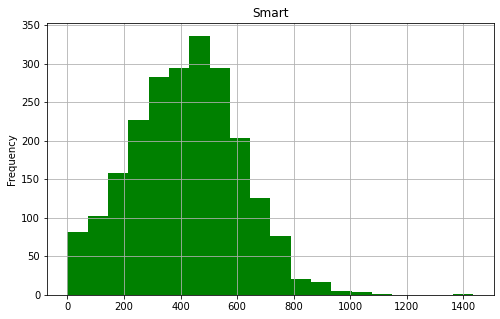

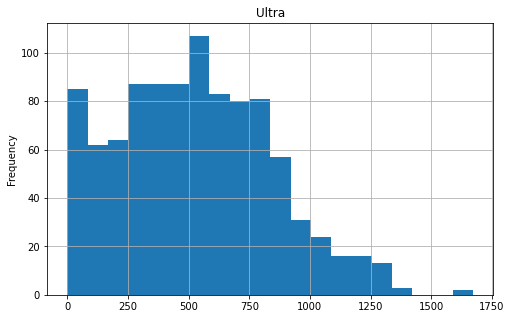

messages_quantity


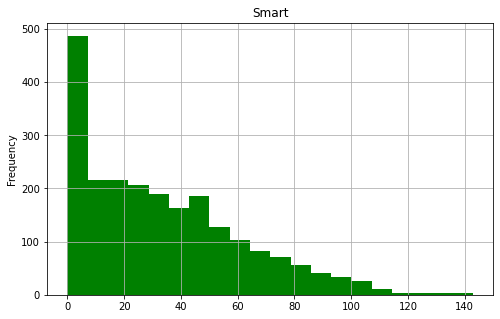

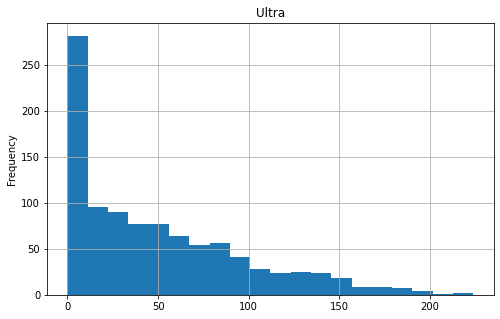

traffic_volume


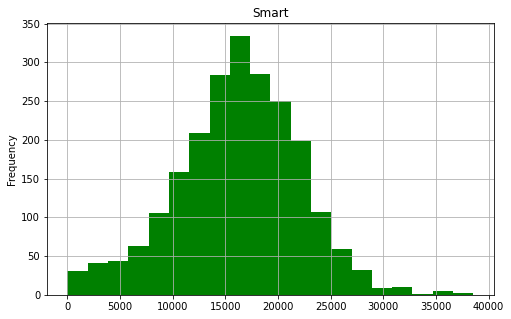

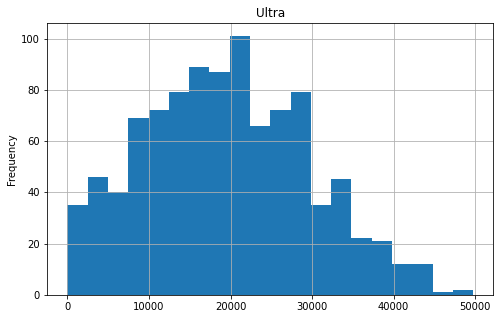

In [43]:
#Построим гистограммы
columns = ['duration_total', 'messages_quantity', 'traffic_volume']
rcParams['figure.figsize'] = 8,5
for column in columns:
    print(column)
    smart_tarif[column].plot(
        kind='hist',
        title='Smart',
        grid=True,
        color='green',
        bins=20,
        xlabel='Quantity'
    )
    plt.show()
    ultra_tarif[column].plot(
        kind='hist',
        grid=True,
        title='Ultra',
        bins=20
    )
    plt.show()
    

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Вы уже проходили подписи графиков (осей), но можно их добавить, чтобы гистограмма стала информативнее. Можно почитать здесь, как добавить подписи: https://pyprog.pro/mpl/mpl_axis_signatures.html

<div class="alert alert-block alert-info">
    
**Вопрос студента**

Как добавить подписи осей в данном случае в цикле в методe pandas plot?
Согласно документации https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
За подписи осей отвечают параметры xlabel и ylabel. Но когда я их добавляю подписи не появляются
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Вот здесь про это написано https://stackoverflow.com/questions/66729481/customise-plot-labels-in-a-loop

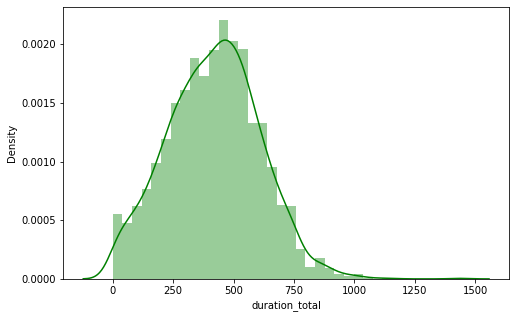

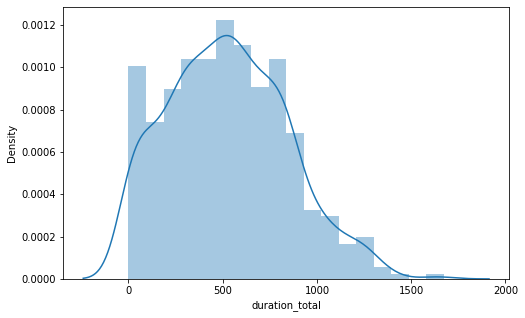

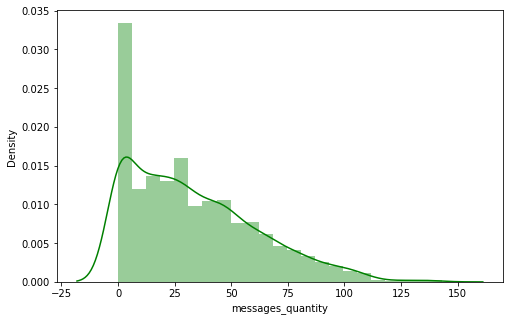

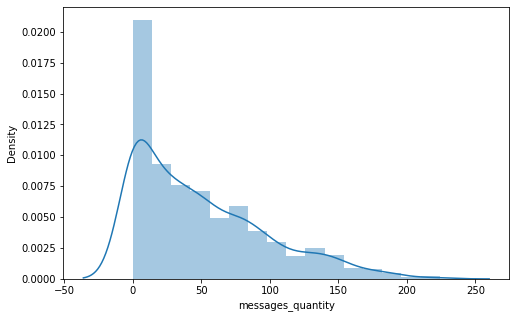

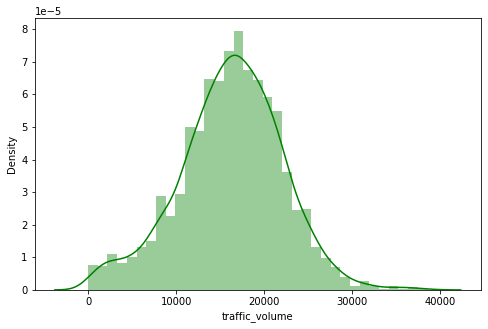

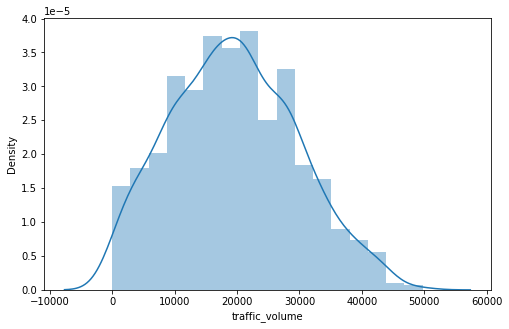

In [44]:
#Нарисуем также гистограммы при помощи библиотеки seaborn
warnings.filterwarnings("ignore")
for column in columns:
    sns.distplot(smart_tarif[column], color='green')
    plt.show()
    sns.distplot(ultra_tarif[column])
    plt.show()

<div class="alert alert-block alert-info">
Среднемесячная длительность звонков за 2018 год в минутах стремится к нормальному распределению для тарифа Smart, распределение для тарифа Ultra имеет 2 горба -на 500 минутах (стандартное поведение пользователей), и на 800 минутах, которые общаются больше. Среднее в тарифе Ultra больше, как и стандартное отклонение, последнее говорит о том, что данные более сильно разбросаны вокруг среднего. Большинство пользователей по обоим тарифам не выходят за рамки лимита включенных в тарифы минут для разговоров.
    
    
Среднемесячное количество сообщений за 2018 год стремится к распределению Пуассона, судя по графикам, для обоих тарифов. Это говорит о том, что большинство пользователей отправляют немного сообщений в месяц. Однако, присутствуют группы пользователей, которые отправляют больше сообщений. Для тарифа Ultra таких пользователей гораздо больше, и это неудивительно, так как тариф  включает 1000 бесплатных сообщений. И скорее всего этот тариф используют пользователи, которым часто приходится общаться посредством смс-переписки. Стандартное отклонение для тарифа Ultra также больше, как и для длительности минут.

    
Среднемесячный объём трафика для тарифа Smart распределен нормально, большинство пользователей немного выходя за интервал 15 Гб включенного трафика, что говорит о дополнительной плате для большинства помимо ежемесячной платы. Распределение для тарифа Ultra нельзя назвать нормальным, так как видим 2 горба на 20 Гб и 29 Гб примерно. Дополнительные платы по трафику не предусматриваются для большинства пользовтаелей, обе группы не превышают включенный в тариф лимит в 30 Гб. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Верно

In [45]:
#Рассчитаем статистики в рамках каждого тарифа для выручки и построим распределения
statistics = pd.DataFrame({
    'tarif': ['smart', 'ultra'],
    'mean': [smart_tarif['gain'].mean(), ultra_tarif['gain'].mean()],
    'variance': [np.var(smart_tarif['gain']), np.var(ultra_tarif['gain'])],
    'std': [np.std(smart_tarif['gain']), np.std(ultra_tarif['gain'])]
})
statistics

,tarif,mean,variance,std
0,smart,1289.973531,669485.220923,818.220765
1,ultra,2070.152284,141373.073256,375.996108


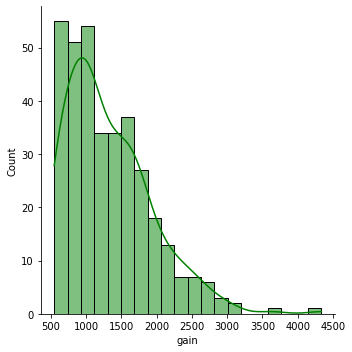

In [46]:
sns.displot(smart_tarif.groupby('user_id')['gain'].mean(), color='green', bins=20, kde=True)

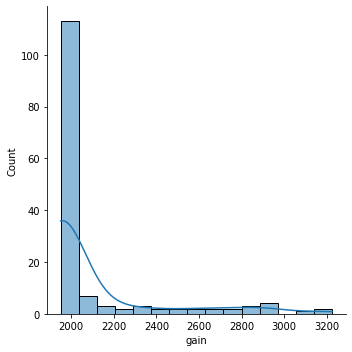

In [47]:
sns.displot(ultra_tarif.groupby('user_id')['gain'].mean(), bins=15, kde=True)

<div class="alert alert-block alert-info">
Средние значения выручки по обоим тарифам для каждого пользователя распределены по распределению Пуассона. Большинство пользователей приносят среднемесячную выручку по тарифу Smart около 1000 рублей, однако есть немаленькие группы пользователей, которые приносят большую выручку.
Если говорить от тарифе Ultra, видно по графику, что почти все пользователи платят около 2000 рублей в месяц (ежемесячную плату), и только очень маленькие группы пользователей платят больше.
</div>

## Проверка гипотез

<div class="alert alert-block alert-info">
<b>Проверка гипотезы:</b> средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

<b>Нулевая гипотеза:</b> средняя выручка пользователей тарифа Ultra равна средней выручке пользователей тарифа Smart

<b>Альтернативная гипотеза:</b> средняя выручка пользователей тарифа Ultra не равна средней выручке пользователей тарифа Smart
</div>    

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Гипотезы сформулированы корректно

<div class="alert alert-block alert-info">
Для того, чтобы проверить данную гипотезу и применить t-test необходимо рассмотреть три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:

- Генеральные совокупности не должны зависеть друг от друга.
В нашем случае совокупности не являются зависимыми друг от друга. (Только, как сформулировать правильно вывод о независимости в данном случае, я не очень понимаю...)

- Выборочные средние должны быть нормально распределены (Tckb 

- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
Если выборки разных размеров, необходимо в тесте установить специальный параметр False или если есть сомнения, что дисперсии у совокупностей одинаковые.

Посмотрим на размер выборок.

</div>

<div class="alert alert-block alert-info">

**Вопрос студента**

Разве данные совокупности являются независимыми? Ведь тариф не может быть одновременно "Ултра" и "Смарт". Как правильно сформулировать вывод о независимости данных выборок?

Нужно ли проверять, как распределены выборочные средние? И как это делать, если что?
</div>

In [48]:
#Посмотрим на размеры выборок
user_information.groupby('tariff')['user_id'].count()

tariff
smart    2229
ultra     985
Name: user_id, dtype: int64

<div class="alert alert-block alert-info">
Так как размеры выборок не равны, устанавливаем в тесте специальный параметр. Дисперсии выборок также не равны, можно увидеть по таблице выше.
</div>

In [49]:
alpha = 0.05
results = st.ttest_ind(
    ultra_tarif['gain'],
    smart_tarif['gain'],
    equal_var=False 
)
print("p-значение:", results.pvalue)
if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
Таким образом отвергаем гипотезу о том, что средняя выручка тарифа Ultra равна средней выручке тарифа Smart 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Корректно

<div class="alert alert-block alert-info">
<b>Проверка гипотезы:</b> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<b>Нулевая гипотеза:</b> средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.


<b>Альтернативная гипотеза:</b> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
</div>    

In [50]:
moscow_gain = user_information[user_information['city'] == 'Москва']
other_gain = user_information[user_information['city'] != 'Москва']

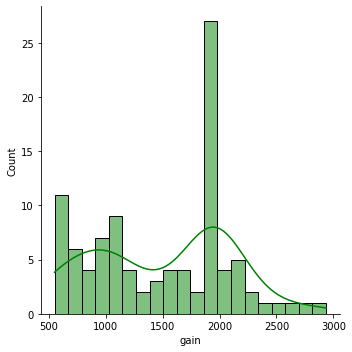

In [51]:
#Посмотрим на распределения
sns.displot(moscow_gain.groupby('user_id')['gain'].mean(), color='green', bins=20, kde=True)

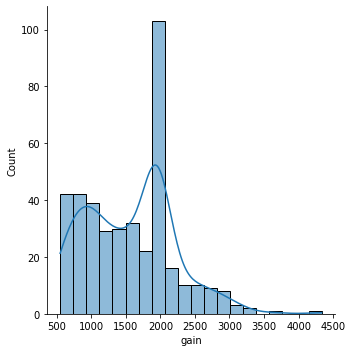

In [52]:
sns.displot(other_gain.groupby('user_id')['gain'].mean(), bins=20, kde=True)

<div class="alert alert-block alert-info">
Данные распределения сложно назвать нормальными, однако пики по середине графика, более близко распределение к нормальному для обеих выборок.
<div>

In [53]:
print('Размеры выборок:', len(moscow_gain), len(other_gain))

Размеры выборок: 611 2603


<div class="alert alert-block alert-info">
Так как размеры выборок не равны, устанавливаем в тесте специальный параметр.
</div>

In [54]:
alpha = 0.05
results = st.ttest_ind(
    moscow_gain['gain'],
    other_gain['gain'],
    equal_var=False 
)
print("p-значение:", results.pvalue)
if results.pvalue < alpha:
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
Принимаем гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
</div>

<div class="alert alert-block alert-info">
Формулировали гипотезы, исходя из равенства средних двух выборок. Использовали критерий ttest  с параметром, который предполагает, что дисперсии у выборок разные. Порговое значение alpha задали, равное 5 %.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все так

## Общий вывод

<div class="alert alert-block alert-info">
Таким образом, в данном проекте были проанализированы данные по двум тарифам, рассчитаны статистики по показателям. Проверив гипотезу о равенстве средних значений выручки двух тарифов, пришли к выводу, что средние не равны. Так как среденее для тарифа Ultra больше, чем для тарифа Smart, значит тариф Ultra приносит больше выручки, и он является более выгодным.
Также проверили гипотезу о том, что средняя выручка пользователей Москвы примерно равна средней выручке пользователей из других регионов. Данная гипотеза была принята.
</div>

<div class="alert alert-block alert-info">
Тариф "Ультра" приносит больше выручки, соответсвенно для целей повышения бюджета он является лучше тарифа "Смарт".
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Целью исследования было дать рекомендации отделу маркетинга по корректировке бюджета. Давай сделаем это!

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Вывод отражает цели исследования

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за проект! Видно, что ты старалась и он получился очень сильным. Ты аккуратно работаешь с данными и выносишь качественные предположения - как настоящий аналитик. Давай сделаем его еще лучше: доработаем финальный вывод. Оставила направляющие комментарии. Возвращаю тебе работу, чтобы ты смогла задать вопросы. Буду ждать твою работу на финальное ревью!
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Спасибо за проработку комментариев! Теперь все отлично. Если у тебя возникнут вопросы, смело задавай мне их через куратора. Удачи на следующих этапах!